In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting up the working directory
import os

WORK_DIR = '/content/drive/MyDrive/WasAdvGAN/mnist'
os.chdir(WORK_DIR)
print(os.listdir('./'))

DATA_DIR = 'data'
os.makedirs(DATA_DIR, exist_ok=True)
print(os.listdir(DATA_DIR))

MODEL_DIR = 'saved_models'
os.makedirs(MODEL_DIR, exist_ok=True)
print(os.listdir(MODEL_DIR))

PLOT_DIR = 'plots'
os.makedirs(PLOT_DIR, exist_ok=True)
print(os.listdir(PLOT_DIR))

WAGAN_DIR = 'wagan'
os.makedirs(WAGAN_DIR, exist_ok=True)
print(os.listdir(WAGAN_DIR))

WAGAN_DATA_DIR = 'data/wagan'
os.makedirs(WAGAN_DATA_DIR, exist_ok=True)
print(os.listdir(WAGAN_DATA_DIR))

['models.py', 'data', '__pycache__', 'saved_models', 'plots', 'advgan', 'wagan', 'advgan.py', 'pipeline.py', 'wasserstein.py', 'Experiments.ipynb', 'AdvGAN.ipynb', 'wagan.py', 'WAGAN-beta_zero.ipynb', 'WAGAN-beta_plus.ipynb', 'WAGAN-beta_minus.ipynb']
['MNIST', 'advgan', 'wagan']
['model_original.pth', 'config_original.json', 'model_advgan_original.pth', 'config_advgan_original.json']
['training_error_original.png']
['beta_plus', 'beta_minus']
['adv_train_images_beta_plus.pickle', 'train_labels_beta_plus.pickle', 'adv_test_images_beta_plus.pickle', 'test_labels_beta_plus.pickle']


In [3]:
from tqdm.notebook import tqdm
import itertools
import math
import json
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch
import numpy as np
import models
import torch.nn.functional as F
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from pipeline import TargetModel_Pipeline
from wagan import WAGAN_Attack

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

## WAGAN adversarial attack

In [5]:
config = dict()
config['name'] = 'beta_zero'
config['model_num_labels'] = 10
config['image_nc'] = 1
config['box_min'] = 0
config['box_max'] = 1
config['trained_model'] = MODEL_DIR + '/model_original.pth'
config['adv_loss_fnc'] = 'c&w'
config['adv_lambda'] = 10
config['pert_lambda'] = 0
config['weights'] = 'init'
config['trained_gen_model'] = None
config['trained_gen_model'] = None
config['initial_lr'] = 0.001
config['cutoff_epochs1'] = 50
config['cutoff_lr1'] = 0.0001
config['cutoff_epochs2'] = 80
config['cutoff_lr2'] = 0.00001
config['batch_size'] = 128
config['num_epochs'] = 60

In [6]:
wagan = WAGAN_Attack(device, config)

In [7]:
mnist_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=False)
dataloader = DataLoader(mnist_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=1)

In [8]:
# training the genereator and discriminator of the AdvGAN model
loss_D_epoch, loss_G_fake_epoch, loss_adv_epoch, loss_perturb_epoch, loss_W_epoch = wagan.fit(dataloader, config['num_epochs'], WAGAN_DIR)

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1:
 loss_D: 0.233,
 loss_G_fake: 0.502,
 loss_adv: 25.258,
 loss_perturb: 14.880, 
 loss_wasserstien: 8971.017, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2:
 loss_D: 0.023,
 loss_G_fake: 0.835,
 loss_adv: 9.310,
 loss_perturb: 17.379, 
 loss_wasserstien: 9557.308, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3:
 loss_D: 0.009,
 loss_G_fake: 0.902,
 loss_adv: 6.099,
 loss_perturb: 18.348, 
 loss_wasserstien: 9466.870, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4:
 loss_D: 0.006,
 loss_G_fake: 0.930,
 loss_adv: 4.505,
 loss_perturb: 18.907, 
 loss_wasserstien: 9552.906, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5:
 loss_D: 0.004,
 loss_G_fake: 0.944,
 loss_adv: 3.872,
 loss_perturb: 19.453, 
 loss_wasserstien: 9458.649, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6:
 loss_D: 0.003,
 loss_G_fake: 0.956,
 loss_adv: 3.607,
 loss_perturb: 19.728, 
 loss_wasserstien: 9455.304, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7:
 loss_D: 0.002,
 loss_G_fake: 0.962,
 loss_adv: 3.151,
 loss_perturb: 20.138, 
 loss_wasserstien: 9448.139, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8:
 loss_D: 0.001,
 loss_G_fake: 0.972,
 loss_adv: 2.782,
 loss_perturb: 20.344, 
 loss_wasserstien: 9600.325, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9:
 loss_D: 0.001,
 loss_G_fake: 0.976,
 loss_adv: 2.599,
 loss_perturb: 20.534, 
 loss_wasserstien: 9665.256, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10:
 loss_D: 0.001,
 loss_G_fake: 0.982,
 loss_adv: 2.795,
 loss_perturb: 20.853, 
 loss_wasserstien: 9671.506, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11:
 loss_D: 0.001,
 loss_G_fake: 0.980,
 loss_adv: 2.325,
 loss_perturb: 21.088, 
 loss_wasserstien: 9691.044, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12:
 loss_D: 0.002,
 loss_G_fake: 0.975,
 loss_adv: 2.393,
 loss_perturb: 21.167, 
 loss_wasserstien: 9700.641, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13:
 loss_D: 0.003,
 loss_G_fake: 0.972,
 loss_adv: 2.112,
 loss_perturb: 21.301, 
 loss_wasserstien: 9569.597, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14:
 loss_D: 0.001,
 loss_G_fake: 0.982,
 loss_adv: 2.227,
 loss_perturb: 21.633, 
 loss_wasserstien: 9539.470, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.919,
 loss_perturb: 21.690, 
 loss_wasserstien: 9618.903, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16:
 loss_D: 0.000,
 loss_G_fake: 0.990,
 loss_adv: 1.950,
 loss_perturb: 21.833, 
 loss_wasserstien: 9749.956, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.785,
 loss_perturb: 21.839, 
 loss_wasserstien: 9818.906, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18:
 loss_D: 0.000,
 loss_G_fake: 0.991,
 loss_adv: 1.978,
 loss_perturb: 22.046, 
 loss_wasserstien: 9750.243, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19:
 loss_D: 0.001,
 loss_G_fake: 0.987,
 loss_adv: 1.780,
 loss_perturb: 22.283, 
 loss_wasserstien: 9735.766, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 20:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 1.833,
 loss_perturb: 22.390, 
 loss_wasserstien: 9725.831, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 21:
 loss_D: 0.000,
 loss_G_fake: 0.993,
 loss_adv: 1.570,
 loss_perturb: 22.347, 
 loss_wasserstien: 9635.927, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 22:
 loss_D: 0.001,
 loss_G_fake: 0.985,
 loss_adv: 1.607,
 loss_perturb: 22.494, 
 loss_wasserstien: 9557.577, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 23:
 loss_D: 0.001,
 loss_G_fake: 0.987,
 loss_adv: 1.516,
 loss_perturb: 22.532, 
 loss_wasserstien: 9565.056, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 24:
 loss_D: 0.001,
 loss_G_fake: 0.987,
 loss_adv: 1.512,
 loss_perturb: 22.482, 
 loss_wasserstien: 9651.848, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 25:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 1.455,
 loss_perturb: 22.666, 
 loss_wasserstien: 9553.545, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 26:
 loss_D: 0.000,
 loss_G_fake: 0.993,
 loss_adv: 1.598,
 loss_perturb: 22.716, 
 loss_wasserstien: 9575.656, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 27:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 1.309,
 loss_perturb: 22.698, 
 loss_wasserstien: 9598.002, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 28:
 loss_D: 0.001,
 loss_G_fake: 0.991,
 loss_adv: 1.280,
 loss_perturb: 22.901, 
 loss_wasserstien: 9632.284, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 29:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 1.272,
 loss_perturb: 22.804, 
 loss_wasserstien: 9728.143, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 30:
 loss_D: 0.000,
 loss_G_fake: 0.994,
 loss_adv: 1.379,
 loss_perturb: 22.993, 
 loss_wasserstien: 9613.106, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 31:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.282,
 loss_perturb: 22.933, 
 loss_wasserstien: 9635.344, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 32:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 1.188,
 loss_perturb: 23.110, 
 loss_wasserstien: 9598.680, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 33:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 1.053,
 loss_perturb: 23.158, 
 loss_wasserstien: 9693.270, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 34:
 loss_D: 0.000,
 loss_G_fake: 0.992,
 loss_adv: 1.151,
 loss_perturb: 23.249, 
 loss_wasserstien: 9730.588, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 35:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 1.186,
 loss_perturb: 23.192, 
 loss_wasserstien: 9671.826, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 36:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.167,
 loss_perturb: 23.191, 
 loss_wasserstien: 9569.639, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 37:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.321,
 loss_perturb: 23.390, 
 loss_wasserstien: 9538.495, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 38:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.990,
 loss_perturb: 23.528, 
 loss_wasserstien: 9601.471, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 39:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 1.022,
 loss_perturb: 23.565, 
 loss_wasserstien: 9683.568, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 40:
 loss_D: 0.000,
 loss_G_fake: 0.995,
 loss_adv: 1.092,
 loss_perturb: 23.567, 
 loss_wasserstien: 9636.994, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 41:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.937,
 loss_perturb: 23.634, 
 loss_wasserstien: 9619.412, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 42:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 1.073,
 loss_perturb: 23.619, 
 loss_wasserstien: 9648.890, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 43:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.920,
 loss_perturb: 23.635, 
 loss_wasserstien: 9789.499, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 44:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.914,
 loss_perturb: 23.667, 
 loss_wasserstien: 9842.758, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 45:
 loss_D: 0.000,
 loss_G_fake: 0.997,
 loss_adv: 0.773,
 loss_perturb: 23.669, 
 loss_wasserstien: 9829.891, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 46:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.881,
 loss_perturb: 23.737, 
 loss_wasserstien: 9824.746, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 47:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.962,
 loss_perturb: 23.819, 
 loss_wasserstien: 9799.878, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 48:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.845,
 loss_perturb: 23.911, 
 loss_wasserstien: 9733.018, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 49:
 loss_D: 0.000,
 loss_G_fake: 0.996,
 loss_adv: 0.949,
 loss_perturb: 23.922, 
 loss_wasserstien: 9718.180, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 50:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.832,
 loss_perturb: 23.865, 
 loss_wasserstien: 9776.623, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 51:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.649,
 loss_perturb: 23.915, 
 loss_wasserstien: 9749.570, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 52:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.564,
 loss_perturb: 23.928, 
 loss_wasserstien: 9743.249, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 53:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.546,
 loss_perturb: 23.934, 
 loss_wasserstien: 9736.467, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 54:
 loss_D: 0.000,
 loss_G_fake: 0.998,
 loss_adv: 0.530,
 loss_perturb: 23.941, 
 loss_wasserstien: 9724.356, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 55:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.480,
 loss_perturb: 23.916, 
 loss_wasserstien: 9744.730, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 56:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.445,
 loss_perturb: 23.916, 
 loss_wasserstien: 9752.396, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 57:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.443,
 loss_perturb: 23.933, 
 loss_wasserstien: 9747.136, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 58:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.444,
 loss_perturb: 23.952, 
 loss_wasserstien: 9734.239, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 59:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.402,
 loss_perturb: 23.937, 
 loss_wasserstien: 9744.091, 



  0%|          | 0/469 [00:00<?, ?it/s]

epoch 60:
 loss_D: 0.000,
 loss_G_fake: 0.999,
 loss_adv: 0.370,
 loss_perturb: 23.932, 
 loss_wasserstien: 9740.775, 



## New Accuracies

In [9]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial training images
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(train_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_train_dataset))
print(num_correct_orig/len(mnist_train_dataset), num_correct_adv/len(mnist_train_dataset))

  0%|          | 0/469 [00:00<?, ?it/s]

59978 296 60000
0.9996333333333334 0.004933333333333333


In [10]:
# calculate accuracy on the adversarial dataset
# accuracy on the new adversarial testing images
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

num_correct_orig, num_correct_adv = wagan.calc_adverserial_acc(test_dataloader)
print(num_correct_orig, num_correct_adv, len(mnist_test_dataset))
print(num_correct_orig/len(mnist_test_dataset), num_correct_adv/len(mnist_test_dataset))

  0%|          | 0/79 [00:00<?, ?it/s]

9915 66 10000
0.9915 0.0066


### Store adverserial train and test images

In [11]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_train_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/train_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/469 [00:00<?, ?it/s]

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [12]:
mnist_test_dataset = torchvision.datasets.MNIST(DATA_DIR, train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

adv_images_list = []
real_labels_list = []

for images, labels in tqdm(test_dataloader):
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  adv_images_list.append(adv_images)
  real_labels_list.append(labels)

adv_images = torch.cat(adv_images_list, dim=0)
real_labels = torch.cat(real_labels_list, dim=0)
print(adv_images.shape)
print(real_labels.shape)

with open(WAGAN_DATA_DIR + '/adv_test_images_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(adv_images, handle)

with open(WAGAN_DATA_DIR + '/test_labels_' + config['name'] + '.pickle', 'wb') as handle:
    pickle.dump(real_labels, handle)

  0%|          | 0/79 [00:00<?, ?it/s]

torch.Size([10000, 1, 28, 28])
torch.Size([10000])


### Examples of Adverserially created images

In [13]:
mnist_train_dataset = torchvision.datasets.MNIST(DATA_DIR, train=True, transform=transforms.ToTensor(), download=True)
train_dataloader = DataLoader(mnist_train_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=1)

images_ex = None
adverserial_images_ex = None

for images, labels in train_dataloader:
  images, labels = images.to(wagan.device), labels.to(wagan.device)
  # Generate adverserial images
  adv_images = wagan.generate_adverserial_images(images).to(wagan.device)
  images_ex = images.detach().clone()
  adverserial_images_ex = adv_images.detach().clone()
  print(images_ex.shape)
  print(adverserial_images_ex.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128, 1, 28, 28])


In [14]:
index = 100
image = torch.squeeze(images_ex[index])
adversary = torch.squeeze(adverserial_images_ex[index])
print(image.shape, adversary.shape)
# Lp distance between the two images
Lp_distance = (image - adversary).pow(2).sum().item()
print(math.sqrt(Lp_distance))

torch.Size([28, 28]) torch.Size([28, 28])
5.98444384343561


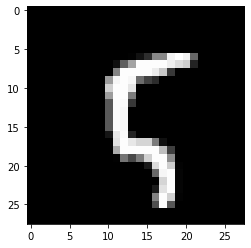

In [15]:
plt.imshow(image.cpu().numpy().squeeze(), cmap='gray')
plt.show()

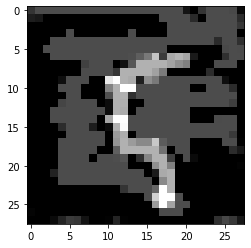

In [16]:
plt.imshow(adversary.cpu().numpy().squeeze(), cmap='gray')
plt.show()